# Xarxes Neuronals

*Font: http://blog.kaggle.com/2017/11/27/introduction-to-neural-networks/*

Here we have a collection of grayscale images, each a 2×2 grid of pixels where each pixel has an intensity value between 0 (white) and 255 (black). The goal is to build a model that identifies images with a “stairs” pattern.

![Dades](figures/fig1.png)

For each image, we label the pixels $x_1, x_2, x_3, x_4$ and generate an input vector $\mathbf{x} = \begin{bmatrix}x_1, & x_2, & x_3, & x_4\end{bmatrix}$ which will be the input to our model. We expect our model to predict ``True`` (the image has the stairs pattern) or ``False`` (the image does not have the stairs pattern).


![Dades](figures/fig2.png)

| ImageId | x1 | x2 | x3 | x4 | IsStairs | 
| ------- | -- | -- | -- | -- | -------- | 
| 1	      | 252| 4	| 155| 175| TRUE | 
| 2	      | 175| 10	| 186| 200| TRUE | 
| 3	      | 82 | 131| 230| 100| FALSE| 
| …	      | …  | …	| …	 | …  | … | 
| 498	  | 36 | 187| 43 | 249| FALSE | 
| 499	  | 1  | 160| 169| 242| TRUE | 
| 500	  | 198| 134| 22 | 188| FALSE | 


## Perceptron

A simple model we could build is a single layer **perceptron**. 

A perceptron uses a weighted linear combination of the inputs to return a prediction score. If the prediction score exceeds a selected threshold, the perceptron predicts ``True``. Otherwise it predicts ``False``. More formally,

$$f(x)={\begin{cases} 1 &{\text{if }}\ w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 > threshold\\ 0 & {\text{otherwise}} \end{cases}} $$

Let’s re-express this as follows

$$\widehat y = \mathbf w \cdot \mathbf x + b $$

$$f(x)={\begin{cases} 1 &{\text{if }}\ \widehat{y} > 0\\ 0 & {\text{otherwise}} \end{cases}} $$

Here $\widehat{y}$ is our prediction score.

![Dades](figures/fig3.png)


For our example, suppose we build the following perceptron:

$$\widehat{y} = -0.0019x_1 + -0.0016x_2 + 0.0020x_3 + 0.0023x_4 + 0.0003 $$

Here’s how the perceptron would perform on some of our training images.

![Dades](figures/fig4.png)

This would certainly be better than randomly guessing and it makes some logical sense. All the stairs patterns have darkly shaded pixels in the bottom row which supports the larger, positive coefficients for $x_3$ and $x_4$. Nonetheless, there are some glaring problems with this model.

The model outputs a real number whose value correlates with the concept of likelihood (higher values imply a greater probability the image represents stairs) but **there’s no basis to interpret the values as probabilities**, especially since they can be outside the range $[0, 1]$.

The model can’t capture the non-linear relationship between the variables and the target. To see this, consider the following hypothetical scenarios:

###  Case A

Start with an image, $x = [100, 0, 0, 125]$. Increase $x_3$ from 0 to 60.

![Dades](figures/fig5.png)

###  Case B

Start with the last image, $x = [100, 0, 60, 125]$. Increase $x_3$ from 60 to 120.

![Dades](figures/fig6.png)

Intuitively, ``Case A`` should have a much larger increase in $\widehat y$ than ``Case B``. However, since our perceptron model is a linear equation, the equivalent +60 change in $x_3$ resulted in an equivalent +0.12 change in $\widehat y$ for both cases.

There are more issues with our linear perception, but let’s start by addressing these two.

## Single Layer Perceptron with Sigmoid activation function.

We can fix problems 1 and 2 above by wrapping our perceptron within a **sigmoid function** (and subsequently choosing different weights). 

Recall that the sigmoid function is an S shaped curve bounded on the vertical axis between 0 and 1, and is thus frequently used to model the probability of a binary event.

![Dades](figures/fig7.png)

$$sigmoid(z) = \frac{1}{1 + e^{-z}} $$

Following this idea, we can update our model with the following picture and equation.

![Dades](figures/fig8.png)

$$z = \mathbf w \cdot \mathbf x + b = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b $$

$$\widehat y = sigmoid(z) = \frac{1}{1 + e^{-z}} $$

> We can simplify notation by *absorving* $b$ in $\mathbf w$. This can be done by extending all examples with an extra dimension with value 1: $x = [100, 0, 0, 125] \rightarrow x = [100, 0, 0, 125, 1]$. Then, $\mathbf w$ will have an extra dimensional and its last value will represent $b$.

Since we now interpret $\widehat y$ as a probability, we must update our decision rule accordingly.

$$f(x)={\begin{cases} 1 &{\text{if }}\ \widehat{y} > 0.5\\ 0 & {\text{otherwise}} \end{cases}} $$

Continuing with our example problem, suppose we come up with the following fitted model:

$$\begin{bmatrix} w_1 & w_2 & w_3 & w_4 \end{bmatrix} = \begin{bmatrix} -0.140 & -0.145 & 0.121 & 0.092 \end{bmatrix} $$

$$b = -0.008 $$

$$\widehat y = \frac{1}{1 + e^{-(-0.140x_1 -0.145x_2 + 0.121x_3 + 0.092x_4 -0.008)}} $$

Observe how this model performs on the same sample images from the previous section.

![Dades](figures/fig9.png)

Clearly this fixes problem 1 from above. Observe how it also fixes problem 2.

### Case A
Start with an image, $x = [100, 0, 0, 125]$. Increase $x_3$ from 0 to 60.

![Dades](figures/fig10.png)

### Case B
Start with the last image, $x = [100, 0, 60, 125]$. Increase $x_3$ from 60 to 120.

![Dades](figures/fig11.png)

Notice how the curvature of the sigmoid function causes ``Case A`` to “fire” (increase rapidly) as $z = \mathbf w \cdot \mathbf x$ increases, but the pace slows down as $z$ continues to increase. This aligns with our intuition that ``Case A`` should reflect a greater increase in the likelihood of stairs versus ``Case B```.

![Dades](figures/fig12.png)

Unfortunately this model still has issues.

+ $\widehat y$ has a monotonic relationship with each variable. What if we want to identify lightly shaded stairs?

+ The model does not account for variable interaction. Assume the bottom row of an image is black. If the top left pixel is white, darkening the top right pixel should increase the probability of stairs. If the top left pixel is black, darkening the top right pixel should decrease the probability of stairs. In other words, increasing $x_3$ should potentially increase or decrease $\widehat y$ depending on the values of the other variables. Our current model has no way of achieving this.

> We cannot solve the XOR problem with a perceptron.

In [1]:
import numpy as np

x = np.array([(47, 250, 8, 88, 1),
     (175, 10, 186, 200, 1),
     (82, 131, 230, 100, 1),
     (36, 187, 43, 249, 1),
     (1,160,169, 242, 1),
     (198, 134, 22, 188, 1)])

y = np.array([0,1,0,0,1,0])

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def logistic(x,w):
    return np.dot(x,w)

def classifier(x,w):
    return sigmoid(logistic(x,w))

w = np.array([-0.140, -0.145, 0.121, 0.092, -0.008])

print(classifier(x[0],w))
print(classifier(x[1],w))

2.1485139023e-15
0.99999967777


## Multi-Layer Perceptron with Sigmoid activation function

We can solve both of the above issues by **adding an extra layer** to our perceptron model. 

We’ll construct a number of base models like the one above, but then we’ll feed the output of each base model as input into another perceptron. This model is in fact a **vanilla neural network**. 

Let’s see how it might work on some examples.

#### Example 1: Identify the stairs pattern

+ Build a model that fires when “left stairs” are identified, $\widehat y_{left}$
+ Build a model that fires when “right stairs” are identified, $\widehat y_{right}$
+ Add the score of the base models so that the final sigmoid function only fires if both $\widehat y_{left}$ and $\widehat y_{right}$ are large.

![Dades](figures/fig13.png)
![Dades](figures/fig14.png)

Alternatively

+ Build a model that fires when the bottom row is dark, $\widehat y_1$
+ Build a model that fires when the top left pixel is dark and the top right pixel is light, $\widehat y_2$
+ Build a model that fires when the top left pixel is light and the top right pixel is dark, $\widehat y_3$
+ Add the base models so that the final sigmoid function only fires if $\widehat y_1$ and $\widehat y_2$ are large, or $\widehat y_1$ and $\widehat y_3$ are large. (Note that $\widehat y_2$ and $\widehat y_3$ cannot both be large)

![Dades](figures/fig15.png)
![Dades](figures/fig16.png)


#### Example 2: Identify lightly shaded stairs

+ Build models that fire for “shaded bottom row”, “shaded x1 and white x2”, “shaded x2 and white x1”, $\widehat y_1$, $\widehat y_2$, and $\widehat y_3$
+ Build models that fire for “dark bottom row”, “dark x1 and white x2”, “dark x2 and white x1”, $\widehat y_4$, $\widehat y_5$, and $\widehat y_6$
+ Combine the models so that the “dark” identifiers are essentially subtracted from the “shaded” identifiers before squashing the result with a sigmoid function.

![Dades](figures/fig17.png)
![Dades](figures/fig18.png)

A single-layer perceptron has a single output layer. Consequently, the models we just built would be called **two-layer perceptrons** because they have an output layer which is the input to another output layer. However, we could call these same models neural networks, and in this respect the networks have three layers – an input layer, a hidden layer, and an output layer.

![Dades](figures/fig19.png)

## Alternative activation functions

In our examples we used a sigmoid activation function. However, we could use other activation functions. ``tanh`` and ``relu`` are common choices.

WARNING: The activation function **must be non-linear**, otherwise the neural network would simplify to an equivalent single layer perceptron.

In [2]:
def relu(x):
    return max(0,x)

print(relu(-3.0), relu(4))

0 4


## Multiclass classification

We can easily extend our model to work for multiclass classification by using multiple nodes in the final output layer. 

The idea here is that each output node corresponds to one of the $C$ classes we are trying to predict. Instead of squashing the output with the sigmoid function which maps an element in $\mathbb{R}$ to and element in $[0, 1]$, we can use the **softmax function** which maps a vector in $\mathbb{R}^n$ to a vector in $\mathbb{R}^n$ such that the resulting vector elements sum to 1. 

$$ \mbox{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$$

In other words, we can design the network such that it outputs the vector $[prob(class_1), prob(class_2), …, prob(class_C)]$.

![Dades](figures/fig20.png)

## Using more than two layers (Deep Learning)

You might be wondering, “Can we extend our vanilla neural network so that its output layer is fed into a 4th layer (and then a 5th, and 6th, etc.)?”. 

Yes. This is what’s commonly referred to as **"deep learning”**. 

In practice it can be very effective. However, it’s worth noting that any network you build with more than one hidden layer can be mimicked by a network with only one hidden layer. In fact, **you can approximate any continuous function using a neural network with a single hidden layer as per the Universal Approximation Theorem**. 

The reasons deep neural network architectures are chosen in favor of single hidden layer architectures are:
+ they converge to a solution during the fitting procedure much more often and much more faster.
+ they use less parameters.

![Dades](figures/fig21.png)

## Fitting the model to labeled training samples (Backpropagation)

Alas we come to the fitting procedure. 

So far we’ve discussed how neural networks could work effectively, but we haven’t discussed how to fit a neural network to labeled training samples. 

An equivalent question would be, **“How can we choose the best weights for a network, given some labeled training samples?”**. 

**Gradient descent** is the common answer. 

Continuing with our example problem, the gradient descent procedure would go something like this:

+ Start with some labeled training data
+ Choose a differentiable loss function to minimize, $L(\mathbf{\widehat Y}, \mathbf{Y})$
+ Choose a network structure. Specifically detemine how many layers and how many nodes in each layer.
+ Initialize the network’s weights randomly
+ Run the training data through the network to generate a prediction for each sample. Measure the overall error according to the loss function, $L(\mathbf{\widehat Y}, \mathbf{Y})$. (This is called forward propagation)
+ Determine how much the current loss will change with respect to a small change in each of the weights. In other words, calculate the gradient of $L$ with respect to every weight in the network. (This is called backward propagation)
+ Take a small “step” in the direction of the negative gradient. For example, if $w_{23} = 1.5$ and $\frac{\partial L}{\partial w_{23}} = 2.2$, then decreasing $w_{23}$ by a small amount should result in a small decrease in the current loss. Hence we update $w_3 := w_3 - 2.2 \times 0.001$ (where $0.001$ is our predetermined “step size”).
+ Repeat this process (from step 5) a fixed number of times or until the loss converges.

That’s the basic idea at least. In practice, this poses a number of challenges.

## Example

We will use the following loss function (**binary cross-entropy**):

$$ L(\mathbf{Y}, \mathbf{\widehat Y}) = - \frac{1}{n} \sum_{i=1}^n 
 y_i  log({\widehat y}_i) + (1 - {y}_i ) log(1- {\widehat y}_i)) $$


In [1]:
import numpy as np

def loss(preds, targets): 
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

a = np.array([1.0, 1.0, 0.0, 1.0])
b = np.array([0.93, 0.7, 0.002, 0.99])
c = np.array([0.003, 0.007, 0.9, 0.009])
print(loss(a,a), loss(a,b), loss(a,c))

-0.0 0.44129797529774234 17.784103914880816


In [2]:
# autograd is a 'magical' function that is able of computing the 
# gradient of any (composed) function f in a point x: f'(x). 
# It is based in a technique called Automatic Differentiation

!pip install autograd

In [4]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_predictions(weights, inputs):
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights, inputs, targets): 
    preds = logistic_predictions(weights, inputs)
    return -np.sum(targets * np.log(preds) + (1 - targets) * np.log(1-preds))

def optimize(inputs, targets, training_loss):
    # Optimize weights using gradient descent.
    gradient_loss = grad(training_loss)
    weights = np.zeros(inputs.shape[1])
    print("Init: ", 
          '%2.2f'%training_loss(weights, inputs, targets),
          weights)
    for i in range(4000):
        weights -= gradient_loss(weights, inputs, targets) * 0.01
        if i%400 == 0:
            print(" Loss:", 
                  '%2.2f'%training_loss(weights, inputs, targets),
                 weights)
    print("End : ", 
          '%2.2f'%training_loss(weights, inputs, targets),
          weights)
    return weights

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77, 1.0],
                   [0.88, -1.08, 0.15, 1.0],
                   [0.52, 0.06, -1.30, 1.0],
                   [0.74, -2.49, 1.39, 1.0]])
targets = np.array([1.0, 1.0, 0.0, 1.0])

weights = optimize(inputs, targets, training_loss)

Init:  2.77 [0. 0. 0. 0.]
 Loss: 2.71 [ 0.0081  -0.01255  0.01805  0.01   ]
 Loss: 0.34 [ 0.69560711 -0.45794972  2.29579094  0.74290165]
 Loss: 0.18 [ 0.89882901 -0.55738105  3.02631358  0.91953264]
 Loss: 0.12 [ 1.02678476 -0.63256494  3.46768696  1.02783688]
 Loss: 0.09 [ 1.12008773 -0.69185849  3.78402527  1.1058602 ]
 Loss: 0.07 [ 1.19340877 -0.74051252  4.03046056  1.16672792]
 Loss: 0.06 [ 1.25374488 -0.78166008  4.23223602  1.21656904]
 Loss: 0.05 [ 1.30497528 -0.81726186  4.40301606  1.25873689]
 Loss: 0.05 [ 1.34947198 -0.84861182  4.55102998  1.29526273]
 Loss: 0.04 [ 1.38878976 -0.87660402  4.68161679  1.32746855]
End :  0.04 [ 1.42391865 -0.90181995  4.79815927  1.35619385]


In [13]:
print(logistic_predictions(weights, np.array([0.0,0.0, 0.0, 1.0])))

0.7951404018516361


## Scikit Learn Multi-layer Perceptron

MLP trains on two arrays: array ``X`` of size ``(n_samples, n_features)``, which holds the training samples represented as floating point feature vectors; and array ``y`` of size ``(n_samples,)``, which holds the target values (class labels) for the training samples:

In [25]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(5, 2), 
                    random_state=1)
clf.fit(X, y)                         

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

After fitting (training), the model can predict labels for new samples:

In [26]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

MLP can fit a non-linear model to the training data. 

``clf.coefs_`` contains the weight matrices that constitute the model parameters:

In [27]:
[coef.shape for coef in clf.coefs_]
#[(2, 5), (5, 2), (2, 1)]

[(2, 5), (5, 2), (2, 1)]

MLP trains using some form of gradient descent and the gradients are calculated using *backpropagation*. 

For classification, it minimizes the Cross-Entropy loss function, giving a vector of probability estimates $P(y|x)$ per sample $x$:

In [28]:
clf.predict_proba([[2., 2.], [-1., -2.]]) 

array([[1.96718015e-004, 9.99803282e-001],
       [1.00000000e+000, 4.67017947e-144]])

MLPClassifier supports multi-class classification by applying Softmax as the output function.

Further, the model supports multi-label classification in which a sample can belong to more than one class. For each class, the raw output passes through the logistic function. Values larger or equal to 0.5 are rounded to 1, otherwise to 0. 

For a predicted output of a sample, the indices where the value is 1 represents the assigned classes of that sample:

In [29]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(15,), 
                    random_state=1)
clf.fit(X, y)  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [30]:
clf.predict([[1., 2.]])

array([[1, 1]])

In [31]:
clf.predict([[0., 0.]])

array([[0, 1]])

### Regression

Class ``MLPRegressor`` implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.


``MLPRegressor`` also supports multi-output regression, in which a sample can have more than one target.

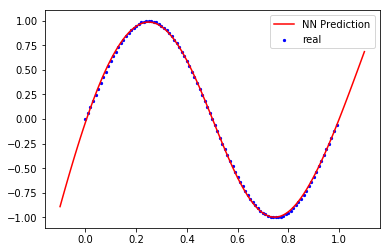

In [37]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 1, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

nn = MLPRegressor(hidden_layer_sizes=(3), 
                  activation='tanh', 
                  solver='lbfgs')

n = nn.fit(x, y)
test_x = np.arange(-0.1, 1.1, 0.01).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=5, c='b', marker="o", label='real')
ax1.plot(test_x,test_y, c='r', label='NN Prediction')

plt.legend()
plt.show()

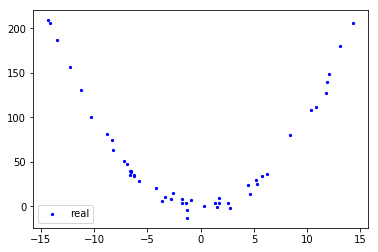

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

np.random.seed(3)
n = 50
x = np.random.uniform(-15, 15, size = n)
y = x**2 + 5*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=5, c='b', marker="o", label='real')

plt.legend()
plt.show()

In [46]:
clf = MLPRegressor(alpha=0.001, 
                   hidden_layer_sizes = (10,), 
                   max_iter = 5000, 
                   activation = 'logistic', 
                   verbose = 'True', 
                   learning_rate = 'adaptive',
                   learning_rate_init=0.1)
a = clf.fit(X, y)

Iteration 1, loss = 3715.49585058
Iteration 2, loss = 3676.36132521
Iteration 3, loss = 3637.87412023
Iteration 4, loss = 3598.60276748
Iteration 5, loss = 3557.45785108
Iteration 6, loss = 3515.27593621
Iteration 7, loss = 3474.12088785
Iteration 8, loss = 3431.75457810
Iteration 9, loss = 3386.37307939
Iteration 10, loss = 3337.91531335
Iteration 11, loss = 3289.48282632
Iteration 12, loss = 3246.09975254
Iteration 13, loss = 3202.98114273
Iteration 14, loss = 3156.66318883
Iteration 15, loss = 3109.83486104
Iteration 16, loss = 3065.51586325
Iteration 17, loss = 3021.61672470
Iteration 18, loss = 2975.20646294
Iteration 19, loss = 2926.78034696
Iteration 20, loss = 2878.86337828
Iteration 21, loss = 2838.84684223
Iteration 22, loss = 2801.13976872
Iteration 23, loss = 2760.66001128
Iteration 24, loss = 2718.77507809
Iteration 25, loss = 2679.08582735
Iteration 26, loss = 2643.66602940
Iteration 27, loss = 2610.10476955
Iteration 28, loss = 2575.95905441
Iteration 29, loss = 2541.317

Iteration 604, loss = 572.46725011
Iteration 605, loss = 569.64728788
Iteration 606, loss = 566.84622801
Iteration 607, loss = 564.06370850
Iteration 608, loss = 561.29929627
Iteration 609, loss = 558.55254906
Iteration 610, loss = 555.82290695
Iteration 611, loss = 553.10978481
Iteration 612, loss = 550.41254617
Iteration 613, loss = 547.73060429
Iteration 614, loss = 545.06344134
Iteration 615, loss = 542.41058814
Iteration 616, loss = 539.77158539
Iteration 617, loss = 537.14594459
Iteration 618, loss = 534.53314444
Iteration 619, loss = 531.93258354
Iteration 620, loss = 529.34350729
Iteration 621, loss = 526.76490213
Iteration 622, loss = 524.19533987
Iteration 623, loss = 521.63269197
Iteration 624, loss = 519.07370671
Iteration 625, loss = 516.51324986
Iteration 626, loss = 513.94291056
Iteration 627, loss = 511.34797168
Iteration 628, loss = 508.70044620
Iteration 629, loss = 505.94161420
Iteration 630, loss = 502.93531089
Iteration 631, loss = 499.35407626
Iteration 632, loss 

Iteration 1159, loss = 44.35695961
Iteration 1160, loss = 44.18707759
Iteration 1161, loss = 44.02617364
Iteration 1162, loss = 43.87962799
Iteration 1163, loss = 43.73892241
Iteration 1164, loss = 43.59458739
Iteration 1165, loss = 43.44636848
Iteration 1166, loss = 43.29828197
Iteration 1167, loss = 43.15116400
Iteration 1168, loss = 43.00402216
Iteration 1169, loss = 42.85420410
Iteration 1170, loss = 42.70448204
Iteration 1171, loss = 42.55833595
Iteration 1172, loss = 42.41704863
Iteration 1173, loss = 42.27807935
Iteration 1174, loss = 42.13734984
Iteration 1175, loss = 41.99413580
Iteration 1176, loss = 41.84872419
Iteration 1177, loss = 41.70354471
Iteration 1178, loss = 41.55878169
Iteration 1179, loss = 41.41382195
Iteration 1180, loss = 41.26770340
Iteration 1181, loss = 41.11998042
Iteration 1182, loss = 40.97069380
Iteration 1183, loss = 40.81894342
Iteration 1184, loss = 40.66232391
Iteration 1185, loss = 40.49758085
Iteration 1186, loss = 40.31990662
Iteration 1187, loss

+ ``alpha`` is a regularization parameter. The higher this value, the higher the penalty for high network weights.
+ ``hidden_layer_sizes`` defines the network architecture. You can add hidden layers by simply lengthening this tuple. MLPRegressor deduces the dimensions of input and output layers automatically. Here, the network architecture is (1,10,1)(1,10,1).
+ ``max_iter`` defines the maximum number of learning iterations before termination. Usually, the learning terminates earlier due to the lack of improvement of the error metric.
+ ``activation`` defines the activation function. Other popular choices are 'tanh' (Tangens Hyperbolicus) and 'relu' (Rectified Linear Unit).
+ ``learning_rate``  defines the learning rate for the weight update. The higher this value, the faster the network can learn. However, learning might end up oscillating instead of converging. Setting the learning rate to 'adaptive' gradually decreases weight and usually solves this problem.

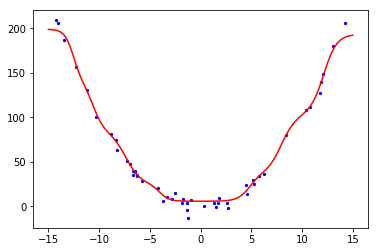

In [47]:
n = 100
x_ = np.linspace(-15, 15, n) # define axis

pred_x = np.reshape(x_, [n, 1]) # [n, ] -> [n, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.scatter(x, y, c='b', s=5, marker="o") # plot original function
plt.plot(pred_x, pred_y, 'r') # plot network output
plt.show()

`` class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)``

In [54]:
np.random.seed(3)
n = 25
x = np.random.uniform(-15, 15, size = n)
y = x**2 + 5*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

clf = MLPRegressor(alpha=0.01, 
                   hidden_layer_sizes = (10,), 
                   max_iter = 100000, 
                   activation = 'logistic', 
                   verbose = 'True', 
                   nesterovs_momentum=False, 
                   learning_rate_init=0.01, 
                   tol=0.00000000001)
a = clf.fit(X, y)
x_ = np.linspace(-15, 15, 200) # define axis

pred_x = np.reshape(x_, [200, 1]) # [200, ] -> [200, 1]
pred_y = clf.predict(pred_x) # predict network output given x_

Iteration 1, loss = 3921.53101097
Iteration 2, loss = 3917.14902017
Iteration 3, loss = 3912.78733179
Iteration 4, loss = 3908.44257340
Iteration 5, loss = 3904.11197409
Iteration 6, loss = 3899.79382661
Iteration 7, loss = 3895.48883169
Iteration 8, loss = 3891.19995034
Iteration 9, loss = 3886.93198745
Iteration 10, loss = 3882.69128116
Iteration 11, loss = 3878.48533876
Iteration 12, loss = 3874.32238953
Iteration 13, loss = 3870.21087548
Iteration 14, loss = 3866.15891906
Iteration 15, loss = 3862.17381595
Iteration 16, loss = 3858.26160103
Iteration 17, loss = 3854.42672808
Iteration 18, loss = 3850.67188786
Iteration 19, loss = 3846.99797028
Iteration 20, loss = 3843.40415758
Iteration 21, loss = 3839.88812135
Iteration 22, loss = 3836.44628960
Iteration 23, loss = 3833.07414922
Iteration 24, loss = 3829.76655313
Iteration 25, loss = 3826.51800798
Iteration 26, loss = 3823.32292511
Iteration 27, loss = 3820.17582454
Iteration 28, loss = 3817.07148797
Iteration 29, loss = 3814.005

Iteration 563, loss = 2101.66489270
Iteration 564, loss = 2100.50599313
Iteration 565, loss = 2099.35117588
Iteration 566, loss = 2098.20042248
Iteration 567, loss = 2097.05371453
Iteration 568, loss = 2095.91103373
Iteration 569, loss = 2094.77236183
Iteration 570, loss = 2093.63768066
Iteration 571, loss = 2092.50697215
Iteration 572, loss = 2091.38021828
Iteration 573, loss = 2090.25740111
Iteration 574, loss = 2089.13850279
Iteration 575, loss = 2088.02350553
Iteration 576, loss = 2086.91239162
Iteration 577, loss = 2085.80514342
Iteration 578, loss = 2084.70174338
Iteration 579, loss = 2083.60217400
Iteration 580, loss = 2082.50641789
Iteration 581, loss = 2081.41445770
Iteration 582, loss = 2080.32627616
Iteration 583, loss = 2079.24185610
Iteration 584, loss = 2078.16118040
Iteration 585, loss = 2077.08423201
Iteration 586, loss = 2076.01099396
Iteration 587, loss = 2074.94144937
Iteration 588, loss = 2073.87558140
Iteration 589, loss = 2072.81337331
Iteration 590, loss = 2071.7

Iteration 1141, loss = 1758.93022999
Iteration 1142, loss = 1758.55726894
Iteration 1143, loss = 1758.18446307
Iteration 1144, loss = 1757.81181118
Iteration 1145, loss = 1757.43931208
Iteration 1146, loss = 1757.06696459
Iteration 1147, loss = 1756.69476753
Iteration 1148, loss = 1756.32271974
Iteration 1149, loss = 1755.95082004
Iteration 1150, loss = 1755.57906729
Iteration 1151, loss = 1755.20746032
Iteration 1152, loss = 1754.83599802
Iteration 1153, loss = 1754.46467922
Iteration 1154, loss = 1754.09350282
Iteration 1155, loss = 1753.72246768
Iteration 1156, loss = 1753.35157269
Iteration 1157, loss = 1752.98081674
Iteration 1158, loss = 1752.61019874
Iteration 1159, loss = 1752.23971757
Iteration 1160, loss = 1751.86937216
Iteration 1161, loss = 1751.49916142
Iteration 1162, loss = 1751.12908428
Iteration 1163, loss = 1750.75913966
Iteration 1164, loss = 1750.38932650
Iteration 1165, loss = 1750.01964375
Iteration 1166, loss = 1749.65009035
Iteration 1167, loss = 1749.28066525
I

Iteration 1661, loss = 1564.43454860
Iteration 1662, loss = 1563.96366146
Iteration 1663, loss = 1563.49072296
Iteration 1664, loss = 1563.01566593
Iteration 1665, loss = 1562.53841845
Iteration 1666, loss = 1562.05890333
Iteration 1667, loss = 1561.57703751
Iteration 1668, loss = 1561.09273147
Iteration 1669, loss = 1560.60588849
Iteration 1670, loss = 1560.11640384
Iteration 1671, loss = 1559.62416385
Iteration 1672, loss = 1559.12904487
Iteration 1673, loss = 1558.63091202
Iteration 1674, loss = 1558.12961789
Iteration 1675, loss = 1557.62500088
Iteration 1676, loss = 1557.11688346
Iteration 1677, loss = 1556.60506997
Iteration 1678, loss = 1556.08934427
Iteration 1679, loss = 1555.56946688
Iteration 1680, loss = 1555.04517164
Iteration 1681, loss = 1554.51616192
Iteration 1682, loss = 1553.98210597
Iteration 1683, loss = 1553.44263165
Iteration 1684, loss = 1552.89732000
Iteration 1685, loss = 1552.34569770
Iteration 1686, loss = 1551.78722800
Iteration 1687, loss = 1551.22129982
I

Iteration 2238, loss = 1049.42089496
Iteration 2239, loss = 1047.98003431
Iteration 2240, loss = 1046.50894290
Iteration 2241, loss = 1045.00284912
Iteration 2242, loss = 1043.51354003
Iteration 2243, loss = 1042.08712013
Iteration 2244, loss = 1040.73387896
Iteration 2245, loss = 1039.43850440
Iteration 2246, loss = 1038.17958099
Iteration 2247, loss = 1036.94011738
Iteration 2248, loss = 1035.71061042
Iteration 2249, loss = 1034.49048664
Iteration 2250, loss = 1033.28833933
Iteration 2251, loss = 1032.11787710
Iteration 2252, loss = 1030.98919933
Iteration 2253, loss = 1029.90066956
Iteration 2254, loss = 1028.83895418
Iteration 2255, loss = 1027.78887880
Iteration 2256, loss = 1026.74438176
Iteration 2257, loss = 1025.71049457
Iteration 2258, loss = 1024.69663486
Iteration 2259, loss = 1023.70888413
Iteration 2260, loss = 1022.74661427
Iteration 2261, loss = 1021.80387198
Iteration 2262, loss = 1020.87347738
Iteration 2263, loss = 1019.95117532
Iteration 2264, loss = 1019.03744156
I

Iteration 2734, loss = 799.03749316
Iteration 2735, loss = 798.68077638
Iteration 2736, loss = 798.32434602
Iteration 2737, loss = 797.96813972
Iteration 2738, loss = 797.61210528
Iteration 2739, loss = 797.25620460
Iteration 2740, loss = 796.90041501
Iteration 2741, loss = 796.54472858
Iteration 2742, loss = 796.18915002
Iteration 2743, loss = 795.83369406
Iteration 2744, loss = 795.47838243
Iteration 2745, loss = 795.12324101
Iteration 2746, loss = 794.76829690
Iteration 2747, loss = 794.41357570
Iteration 2748, loss = 794.05909917
Iteration 2749, loss = 793.70488331
Iteration 2750, loss = 793.35093732
Iteration 2751, loss = 792.99726340
Iteration 2752, loss = 792.64385751
Iteration 2753, loss = 792.29071079
Iteration 2754, loss = 791.93781150
Iteration 2755, loss = 791.58514708
Iteration 2756, loss = 791.23270584
Iteration 2757, loss = 790.88047830
Iteration 2758, loss = 790.52845787
Iteration 2759, loss = 790.17664095
Iteration 2760, loss = 789.82502660
Iteration 2761, loss = 789.4

Iteration 3253, loss = 641.05190759
Iteration 3254, loss = 640.79357904
Iteration 3255, loss = 640.53538766
Iteration 3256, loss = 640.27733186
Iteration 3257, loss = 640.01940981
Iteration 3258, loss = 639.76161947
Iteration 3259, loss = 639.50395853
Iteration 3260, loss = 639.24642436
Iteration 3261, loss = 638.98901395
Iteration 3262, loss = 638.73172387
Iteration 3263, loss = 638.47455018
Iteration 3264, loss = 638.21748832
Iteration 3265, loss = 637.96053298
Iteration 3266, loss = 637.70367802
Iteration 3267, loss = 637.44691621
Iteration 3268, loss = 637.19023909
Iteration 3269, loss = 636.93363662
Iteration 3270, loss = 636.67709690
Iteration 3271, loss = 636.42060572
Iteration 3272, loss = 636.16414600
Iteration 3273, loss = 635.90769713
Iteration 3274, loss = 635.65123407
Iteration 3275, loss = 635.39472618
Iteration 3276, loss = 635.13813575
Iteration 3277, loss = 634.88141605
Iteration 3278, loss = 634.62450875
Iteration 3279, loss = 634.36734047
Iteration 3280, loss = 634.1

Iteration 3772, loss = 480.17594952
Iteration 3773, loss = 479.97466820
Iteration 3774, loss = 479.77353522
Iteration 3775, loss = 479.57254988
Iteration 3776, loss = 479.37171147
Iteration 3777, loss = 479.17101927
Iteration 3778, loss = 478.97047258
Iteration 3779, loss = 478.77007066
Iteration 3780, loss = 478.56981279
Iteration 3781, loss = 478.36969823
Iteration 3782, loss = 478.16972625
Iteration 3783, loss = 477.96989610
Iteration 3784, loss = 477.77020703
Iteration 3785, loss = 477.57065827
Iteration 3786, loss = 477.37124907
Iteration 3787, loss = 477.17197865
Iteration 3788, loss = 476.97284622
Iteration 3789, loss = 476.77385099
Iteration 3790, loss = 476.57499217
Iteration 3791, loss = 476.37626894
Iteration 3792, loss = 476.17768049
Iteration 3793, loss = 475.97922598
Iteration 3794, loss = 475.78090457
Iteration 3795, loss = 475.58271541
Iteration 3796, loss = 475.38465763
Iteration 3797, loss = 475.18673036
Iteration 3798, loss = 474.98893271
Iteration 3799, loss = 474.7

Iteration 4324, loss = 319.28693764
Iteration 4325, loss = 319.09744906
Iteration 4326, loss = 318.90807480
Iteration 4327, loss = 318.71881408
Iteration 4328, loss = 318.52966612
Iteration 4329, loss = 318.34063012
Iteration 4330, loss = 318.15170528
Iteration 4331, loss = 317.96289082
Iteration 4332, loss = 317.77418594
Iteration 4333, loss = 317.58558983
Iteration 4334, loss = 317.39710171
Iteration 4335, loss = 317.20872076
Iteration 4336, loss = 317.02044618
Iteration 4337, loss = 316.83227716
Iteration 4338, loss = 316.64421291
Iteration 4339, loss = 316.45625261
Iteration 4340, loss = 316.26839546
Iteration 4341, loss = 316.08064064
Iteration 4342, loss = 315.89298734
Iteration 4343, loss = 315.70543475
Iteration 4344, loss = 315.51798205
Iteration 4345, loss = 315.33062844
Iteration 4346, loss = 315.14337309
Iteration 4347, loss = 314.95621519
Iteration 4348, loss = 314.76915393
Iteration 4349, loss = 314.58218848
Iteration 4350, loss = 314.39531804
Iteration 4351, loss = 314.2

Iteration 4867, loss = 184.13687846
Iteration 4868, loss = 183.96971362
Iteration 4869, loss = 183.80279159
Iteration 4870, loss = 183.63611109
Iteration 4871, loss = 183.46967086
Iteration 4872, loss = 183.30346962
Iteration 4873, loss = 183.13750612
Iteration 4874, loss = 182.97177911
Iteration 4875, loss = 182.80628736
Iteration 4876, loss = 182.64102963
Iteration 4877, loss = 182.47600471
Iteration 4878, loss = 182.31121137
Iteration 4879, loss = 182.14664842
Iteration 4880, loss = 181.98231466
Iteration 4881, loss = 181.81820889
Iteration 4882, loss = 181.65432994
Iteration 4883, loss = 181.49067663
Iteration 4884, loss = 181.32724779
Iteration 4885, loss = 181.16404226
Iteration 4886, loss = 181.00105890
Iteration 4887, loss = 180.83829655
Iteration 4888, loss = 180.67575407
Iteration 4889, loss = 180.51343034
Iteration 4890, loss = 180.35132422
Iteration 4891, loss = 180.18943460
Iteration 4892, loss = 180.02776037
Iteration 4893, loss = 179.86630041
Iteration 4894, loss = 179.7

Iteration 5406, loss = 82.46194828
Iteration 5407, loss = 82.34375116
Iteration 5408, loss = 82.22585776
Iteration 5409, loss = 82.10826670
Iteration 5410, loss = 81.99097661
Iteration 5411, loss = 81.87398614
Iteration 5412, loss = 81.75729395
Iteration 5413, loss = 81.64089870
Iteration 5414, loss = 81.52479906
Iteration 5415, loss = 81.40899372
Iteration 5416, loss = 81.29348135
Iteration 5417, loss = 81.17826066
Iteration 5418, loss = 81.06333036
Iteration 5419, loss = 80.94868915
Iteration 5420, loss = 80.83433576
Iteration 5421, loss = 80.72026890
Iteration 5422, loss = 80.60648733
Iteration 5423, loss = 80.49298979
Iteration 5424, loss = 80.37977502
Iteration 5425, loss = 80.26684179
Iteration 5426, loss = 80.15418886
Iteration 5427, loss = 80.04181500
Iteration 5428, loss = 79.92971901
Iteration 5429, loss = 79.81789966
Iteration 5430, loss = 79.70635576
Iteration 5431, loss = 79.59508611
Iteration 5432, loss = 79.48408951
Iteration 5433, loss = 79.37336479
Iteration 5434, loss

Iteration 5949, loss = 43.18379488
Iteration 5950, loss = 43.13792363
Iteration 5951, loss = 43.09211277
Iteration 5952, loss = 43.04636219
Iteration 5953, loss = 43.00067181
Iteration 5954, loss = 42.95504152
Iteration 5955, loss = 42.90947122
Iteration 5956, loss = 42.86396081
Iteration 5957, loss = 42.81851021
Iteration 5958, loss = 42.77311930
Iteration 5959, loss = 42.72778799
Iteration 5960, loss = 42.68251619
Iteration 5961, loss = 42.63730380
Iteration 5962, loss = 42.59215072
Iteration 5963, loss = 42.54705685
Iteration 5964, loss = 42.50202211
Iteration 5965, loss = 42.45704640
Iteration 5966, loss = 42.41212961
Iteration 5967, loss = 42.36727167
Iteration 5968, loss = 42.32247246
Iteration 5969, loss = 42.27773191
Iteration 5970, loss = 42.23304991
Iteration 5971, loss = 42.18842638
Iteration 5972, loss = 42.14386121
Iteration 5973, loss = 42.09935433
Iteration 5974, loss = 42.05490562
Iteration 5975, loss = 42.01051502
Iteration 5976, loss = 41.96618241
Iteration 5977, loss

Iteration 6499, loss = 25.03131630
Iteration 6500, loss = 25.00850408
Iteration 6501, loss = 24.98572117
Iteration 6502, loss = 24.96296755
Iteration 6503, loss = 24.94024319
Iteration 6504, loss = 24.91754804
Iteration 6505, loss = 24.89488208
Iteration 6506, loss = 24.87224527
Iteration 6507, loss = 24.84963757
Iteration 6508, loss = 24.82705896
Iteration 6509, loss = 24.80450940
Iteration 6510, loss = 24.78198886
Iteration 6511, loss = 24.75949730
Iteration 6512, loss = 24.73703468
Iteration 6513, loss = 24.71460099
Iteration 6514, loss = 24.69219617
Iteration 6515, loss = 24.66982021
Iteration 6516, loss = 24.64747306
Iteration 6517, loss = 24.62515470
Iteration 6518, loss = 24.60286508
Iteration 6519, loss = 24.58060418
Iteration 6520, loss = 24.55837197
Iteration 6521, loss = 24.53616840
Iteration 6522, loss = 24.51399346
Iteration 6523, loss = 24.49184710
Iteration 6524, loss = 24.46972929
Iteration 6525, loss = 24.44764000
Iteration 6526, loss = 24.42557920
Iteration 6527, loss

Iteration 7043, loss = 16.19970423
Iteration 7044, loss = 16.18897076
Iteration 7045, loss = 16.17810260
Iteration 7046, loss = 16.16724489
Iteration 7047, loss = 16.15652463
Iteration 7048, loss = 16.14580167
Iteration 7049, loss = 16.13500400
Iteration 7050, loss = 16.12425678
Iteration 7051, loss = 16.11359423
Iteration 7052, loss = 16.10290368
Iteration 7053, loss = 16.09218316
Iteration 7054, loss = 16.08152866
Iteration 7055, loss = 16.07091373
Iteration 7056, loss = 16.06026733
Iteration 7057, loss = 16.04963186
Iteration 7058, loss = 16.03905164
Iteration 7059, loss = 16.02848102
Iteration 7060, loss = 16.01789680
Iteration 7061, loss = 16.00734110
Iteration 7062, loss = 15.99682224
Iteration 7063, loss = 15.98630355
Iteration 7064, loss = 15.97578746
Iteration 7065, loss = 15.96530360
Iteration 7066, loss = 15.95484185
Iteration 7067, loss = 15.94438078
Iteration 7068, loss = 15.93393419
Iteration 7069, loss = 15.92351564
Iteration 7070, loss = 15.91311084
Iteration 7071, loss

Iteration 7585, loss = 12.24938798
Iteration 7586, loss = 12.24489232
Iteration 7587, loss = 12.24040470
Iteration 7588, loss = 12.23592501
Iteration 7589, loss = 12.23145292
Iteration 7590, loss = 12.22698826
Iteration 7591, loss = 12.22253118
Iteration 7592, loss = 12.21808190
Iteration 7593, loss = 12.21364044
Iteration 7594, loss = 12.20920662
Iteration 7595, loss = 12.20478030
Iteration 7596, loss = 12.20036148
Iteration 7597, loss = 12.19595027
Iteration 7598, loss = 12.19154674
Iteration 7599, loss = 12.18715084
Iteration 7600, loss = 12.18276246
Iteration 7601, loss = 12.17838155
Iteration 7602, loss = 12.17400813
Iteration 7603, loss = 12.16964225
Iteration 7604, loss = 12.16528393
Iteration 7605, loss = 12.16093312
Iteration 7606, loss = 12.15658976
Iteration 7607, loss = 12.15225382
Iteration 7608, loss = 12.14792531
Iteration 7609, loss = 12.14360427
Iteration 7610, loss = 12.13929067
Iteration 7611, loss = 12.13498449
Iteration 7612, loss = 12.13068570
Iteration 7613, loss

Iteration 8125, loss = 10.60024148
Iteration 8126, loss = 10.59787021
Iteration 8127, loss = 10.59550932
Iteration 8128, loss = 10.59316053
Iteration 8129, loss = 10.59080955
Iteration 8130, loss = 10.58844561
Iteration 8131, loss = 10.58607404
Iteration 8132, loss = 10.58370622
Iteration 8133, loss = 10.58134546
Iteration 8134, loss = 10.57898450
Iteration 8135, loss = 10.57661588
Iteration 8136, loss = 10.57424079
Iteration 8137, loss = 10.57186567
Iteration 8138, loss = 10.56949398
Iteration 8139, loss = 10.56712267
Iteration 8140, loss = 10.56474689
Iteration 8141, loss = 10.56236585
Iteration 8142, loss = 10.55998273
Iteration 8143, loss = 10.55760042
Iteration 8144, loss = 10.55521824
Iteration 8145, loss = 10.55283339
Iteration 8146, loss = 10.55044442
Iteration 8147, loss = 10.54805243
Iteration 8148, loss = 10.54565939
Iteration 8149, loss = 10.54326578
Iteration 8150, loss = 10.54087031
Iteration 8151, loss = 10.53847165
Iteration 8152, loss = 10.53606976
Iteration 8153, loss

Iteration 8686, loss = 8.98439246
Iteration 8687, loss = 8.98223283
Iteration 8688, loss = 8.98007480
Iteration 8689, loss = 8.97791837
Iteration 8690, loss = 8.97576353
Iteration 8691, loss = 8.97361026
Iteration 8692, loss = 8.97145855
Iteration 8693, loss = 8.96930839
Iteration 8694, loss = 8.96715977
Iteration 8695, loss = 8.96501267
Iteration 8696, loss = 8.96286710
Iteration 8697, loss = 8.96072303
Iteration 8698, loss = 8.95858045
Iteration 8699, loss = 8.95643936
Iteration 8700, loss = 8.95429974
Iteration 8701, loss = 8.95216158
Iteration 8702, loss = 8.95002488
Iteration 8703, loss = 8.94788961
Iteration 8704, loss = 8.94575578
Iteration 8705, loss = 8.94362337
Iteration 8706, loss = 8.94149237
Iteration 8707, loss = 8.93936279
Iteration 8708, loss = 8.93723461
Iteration 8709, loss = 8.93510786
Iteration 8710, loss = 8.93298255
Iteration 8711, loss = 8.93085872
Iteration 8712, loss = 8.92873647
Iteration 8713, loss = 8.92661594
Iteration 8714, loss = 8.92449742
Iteration 8715

Iteration 9238, loss = 7.57178413
Iteration 9239, loss = 7.57022879
Iteration 9240, loss = 7.56868119
Iteration 9241, loss = 7.56714126
Iteration 9242, loss = 7.56560895
Iteration 9243, loss = 7.56408420
Iteration 9244, loss = 7.56256695
Iteration 9245, loss = 7.56105716
Iteration 9246, loss = 7.55955477
Iteration 9247, loss = 7.55805972
Iteration 9248, loss = 7.55657197
Iteration 9249, loss = 7.55509146
Iteration 9250, loss = 7.55361814
Iteration 9251, loss = 7.55215195
Iteration 9252, loss = 7.55069285
Iteration 9253, loss = 7.54924078
Iteration 9254, loss = 7.54779571
Iteration 9255, loss = 7.54635756
Iteration 9256, loss = 7.54492631
Iteration 9257, loss = 7.54350189
Iteration 9258, loss = 7.54208426
Iteration 9259, loss = 7.54067337
Iteration 9260, loss = 7.53926918
Iteration 9261, loss = 7.53787163
Iteration 9262, loss = 7.53648068
Iteration 9263, loss = 7.53509629
Iteration 9264, loss = 7.53371841
Iteration 9265, loss = 7.53234698
Iteration 9266, loss = 7.53098198
Iteration 9267

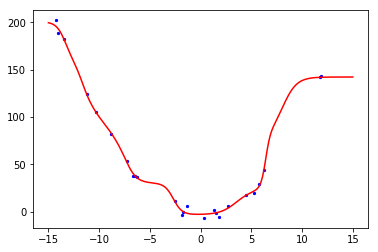

In [55]:
fig = plt.figure() 
plt.scatter(x, y, c='b', s=5, marker="o") # plot original function
plt.plot(pred_x, pred_y, 'r') # plot network output
plt.show()